In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [39]:
train_df = pd.read_csv('train.csv', encoding = 'latin1')
test_df = pd.read_csv('test.csv', encoding = 'latin1')

In [40]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


# Data preprocessing and EDA

In [41]:
train_df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [42]:
test_df.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

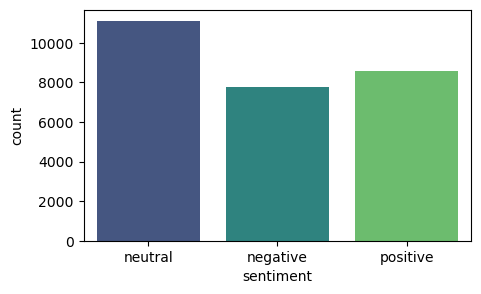

In [43]:
#Visualize sentiment distribution
plt.figure(figsize=(5, 3))
sns.countplot(data=train_df, x='sentiment', hue='sentiment', palette='viridis')
plt.show()

In [44]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [45]:
train_df.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [46]:
test_df.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  object 
 4   Time of Tweet     27480 non-null  object 
 5   Age of User       27480 non-null  object 
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  int64  
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.3+ MB


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 276.1+ KB


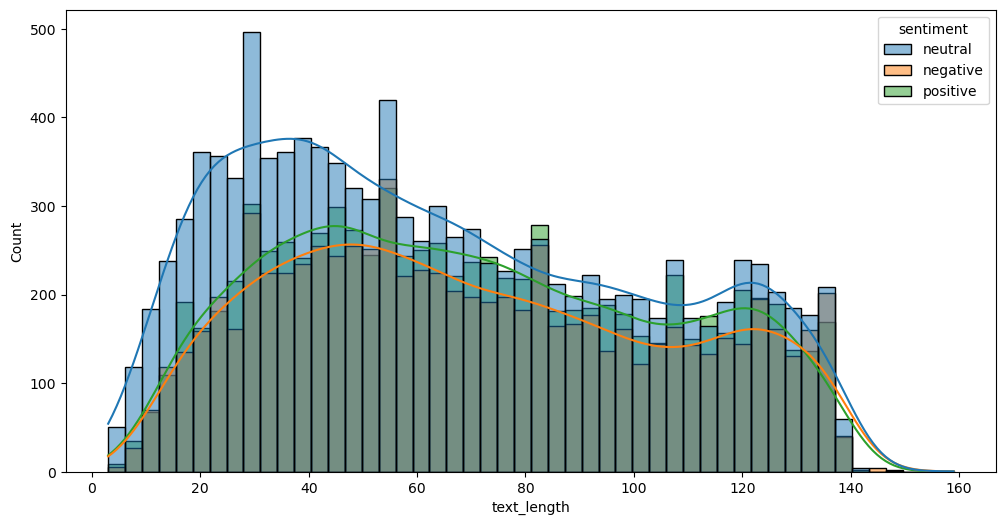

In [49]:
# Explore text length distribution
train_df['text_length'] = train_df['text'].apply(len)
#Calculates the number of characters in the text column and stores itin text_length
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='text_length', hue='sentiment', bins=50, kde=True)
plt.show()
# How long the reviews are (in characters)

## Text cleaning and preprocessing

In [50]:
import regex as re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [51]:
def clean_text(text):
    
    if not text:
        return ""
        
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags (keeping the text after #)
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [52]:
def preprocess_text(text):
    
    if not text:
        return ""

    # Clean text
    text = clean_text(text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

In [53]:
    train_cleaned = train_df.copy()
    test_cleaned = test_df.copy()
    
    train_cleaned['processed_text'] = train_df['text'].apply(preprocess_text)
    test_cleaned['processed_text'] = test_df['text'].apply(preprocess_text)

In [54]:
train_cleaned.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),text_length,processed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,36,id responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,46,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,25,bos bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,31,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,75,son couldnt put release already bought


In [55]:
# Original vs processed text:
print(f"Original: {train_cleaned.iloc[0]['text']}")
print(f"Processed: {train_cleaned.iloc[0]['processed_text']}")

Original:  I`d have responded, if I were going
Processed: id responded going


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

# Fit and transform
train_cleaned['sentiment_encoded'] = le.fit_transform(train_cleaned['sentiment'])
test_cleaned['sentiment_encoded'] = le.fit_transform(test_cleaned['sentiment'])

In [58]:
train_cleaned['sentiment_encoded'].value_counts()

sentiment_encoded
1    11117
2     8582
0     7781
Name: count, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = train_cleaned['processed_text']
y = train_cleaned['sentiment_encoded']

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

Training set size: 21984
Validation set size: 5496


In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
def train_evaluate_model(model_name, vectorizer, classifier, X_train, y_train, X_val, y_val):
    
    # Create a pipeline
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])
    
    # Train the model
    print(f">> Training {model_name}...")
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_val)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Generate confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()  # <--- Show directly in notebook instead of saving
    # plt.savefig(f'confusion_matrix_{model_name}.png')  # Not needed in Jupyter
    # plt.close()
    
    return pipeline, accuracy

In [65]:
# Define vectorizers
count_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Define models to try
models = [
    ('Logistic Regression with Count Vectors', count_vectorizer, LogisticRegression(max_iter=1000, C=1.0)),
    ('Logistic Regression with TF-IDF', tfidf_vectorizer, LogisticRegression(max_iter=1000, C=1.0)),
    ('Naive Bayes with Count Vectors', count_vectorizer, MultinomialNB()),
    ('Naive Bayes with TF-IDF', tfidf_vectorizer, MultinomialNB()),
    ('Linear SVC with TF-IDF', tfidf_vectorizer, LinearSVC(max_iter=1000)),
    ('Random Forest with TF-IDF', tfidf_vectorizer, RandomForestClassifier(n_estimators=100))
]

>> Training Logistic Regression with Count Vectors...
Logistic Regression with Count Vectors Accuracy: 0.6869

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1556
           1       0.63      0.72      0.67      2223
           2       0.77      0.70      0.73      1717

    accuracy                           0.69      5496
   macro avg       0.70      0.68      0.69      5496
weighted avg       0.69      0.69      0.69      5496



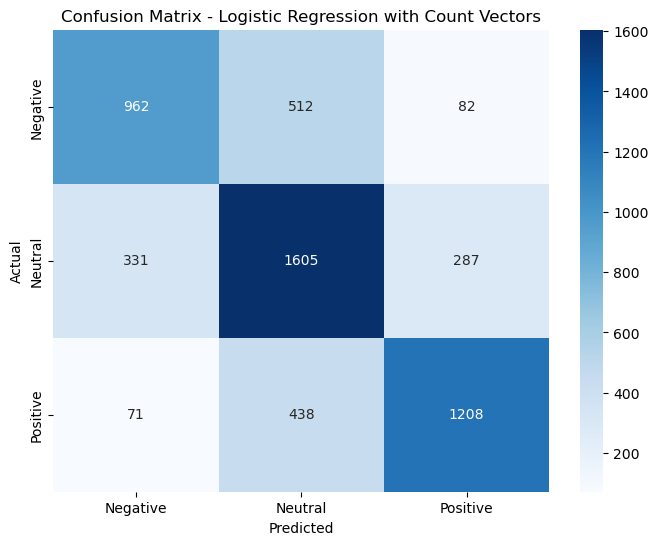

>> Training Logistic Regression with TF-IDF...
Logistic Regression with TF-IDF Accuracy: 0.6861

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65      1556
           1       0.62      0.75      0.68      2223
           2       0.78      0.68      0.73      1717

    accuracy                           0.69      5496
   macro avg       0.71      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496



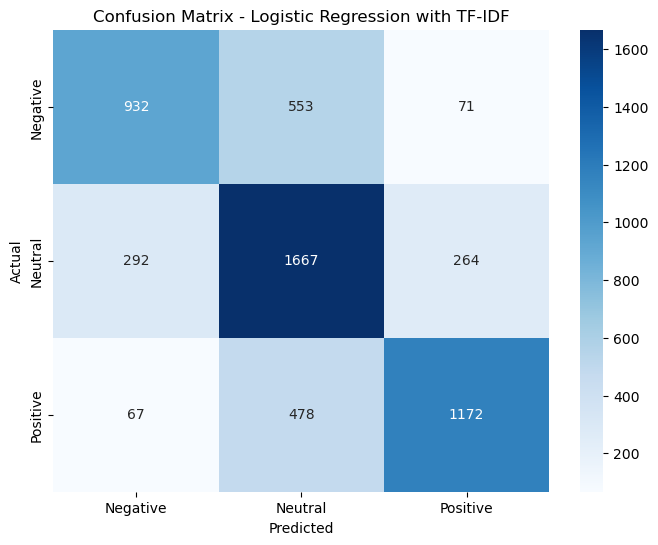

>> Training Naive Bayes with Count Vectors...
Naive Bayes with Count Vectors Accuracy: 0.6512

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      1556
           1       0.60      0.66      0.63      2223
           2       0.71      0.67      0.69      1717

    accuracy                           0.65      5496
   macro avg       0.66      0.65      0.65      5496
weighted avg       0.65      0.65      0.65      5496



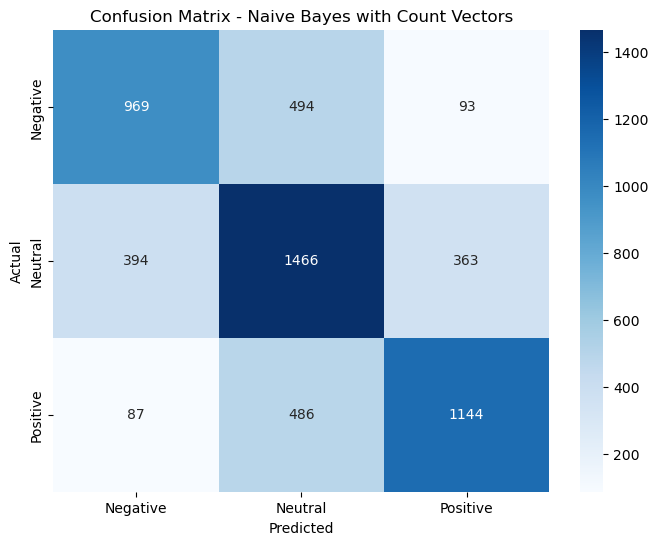

>> Training Naive Bayes with TF-IDF...
Naive Bayes with TF-IDF Accuracy: 0.6312

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59      1556
           1       0.55      0.76      0.64      2223
           2       0.74      0.58      0.65      1717

    accuracy                           0.63      5496
   macro avg       0.67      0.61      0.63      5496
weighted avg       0.66      0.63      0.63      5496



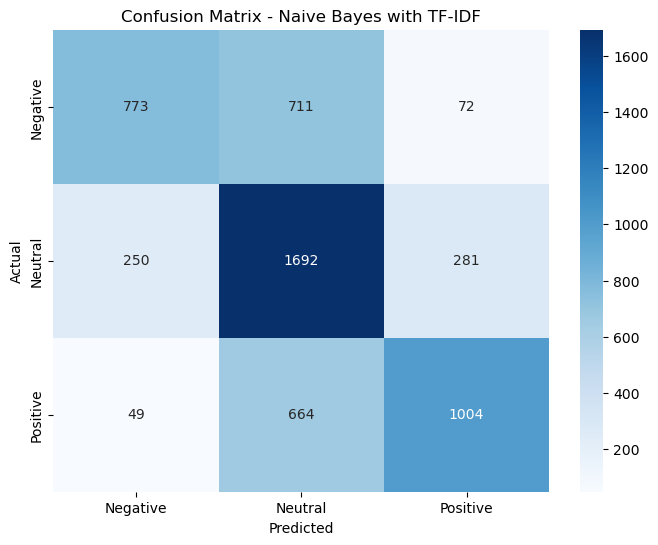

>> Training Linear SVC with TF-IDF...
Linear SVC with TF-IDF Accuracy: 0.6736

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1556
           1       0.63      0.69      0.65      2223
           2       0.74      0.70      0.72      1717

    accuracy                           0.67      5496
   macro avg       0.68      0.67      0.68      5496
weighted avg       0.68      0.67      0.67      5496



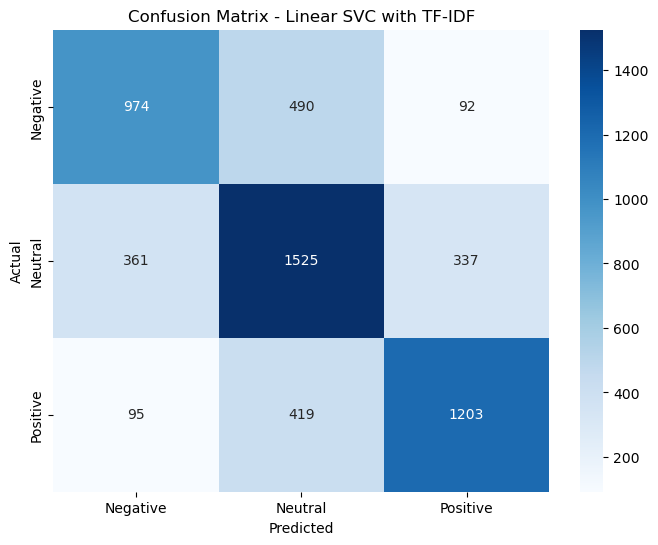

>> Training Random Forest with TF-IDF...
Random Forest with TF-IDF Accuracy: 0.6930

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1556
           1       0.65      0.71      0.68      2223
           2       0.74      0.74      0.74      1717

    accuracy                           0.69      5496
   macro avg       0.70      0.69      0.69      5496
weighted avg       0.70      0.69      0.69      5496



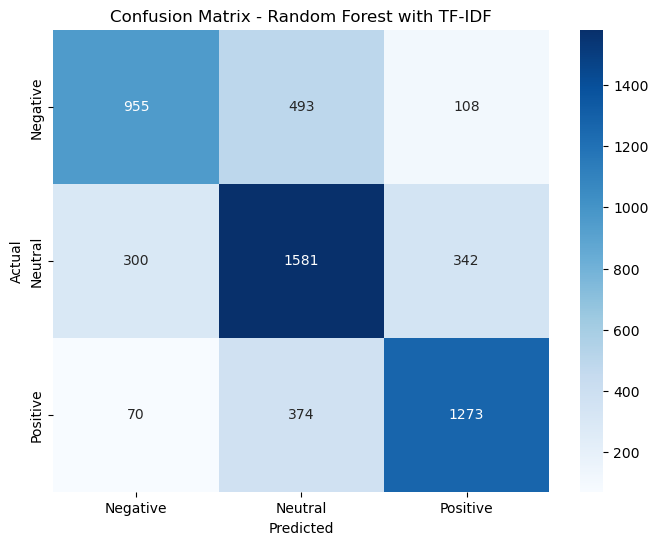

In [66]:
# Train and evaluate each model
results = {}
for model_name, vectorizer, classifier in models:
    pipeline, accuracy = train_evaluate_model(
        model_name, vectorizer, classifier, X_train, y_train, X_val, y_val
    )
    results[model_name] = (pipeline, accuracy)

In [67]:
# Find the best model
best_model_name = max(results.keys(), key=lambda k: results[k][1])
best_pipeline, best_accuracy = results[best_model_name]

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")


Best model: Random Forest with TF-IDF with accuracy: 0.6930


In [68]:
# Get the best model pipeline
best_pipeline = results[best_model_name][0]

# Make predictions on the validation set
y_val_pred = best_pipeline.predict(X_val)

In [69]:
# Classification report
report = classification_report(y_val, y_val_pred)

print(f"Detailed evaluation for {best_model_name}:")
print(f"{accuracy_score(y_val, y_val_pred)}:.4f")
print(report)

Detailed evaluation for Random Forest with TF-IDF:
0.6930494905385735:.4f
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1556
           1       0.65      0.71      0.68      2223
           2       0.74      0.74      0.74      1717

    accuracy                           0.69      5496
   macro avg       0.70      0.69      0.69      5496
weighted avg       0.70      0.69      0.69      5496



In [70]:
    # Visualize F1-scores by class
    plt.figure(figsize=(10, 6))
    # Exclude 'accuracy', 'macro avg', 'weighted avg' from plot
    class_labels = ['0', '2', '4']  # Assuming 0=negative, 2=neutral, 4=positive
    sns.barplot(x=class_labels, y=report_df.loc[class_labels, 'f1-score'], palette="viridis")
    plt.title(f'F1 Scores by Class - {model_name}')
    plt.ylabel("F1 Score")
    plt.ylim(0, 1)
    plt.xlabel("Sentiment Class")
    plt.xticks([0, 1, 2], ['Negative (0)', 'Neutral (2)', 'Positive (4)'])
    plt.tight_layout()
    plt.show()  # Show plot in notebook
    # plt.savefig(f'{model_name}_f1_scores.png')  # Don't save in notebook context
    
    return report_df

NameError: name 'report_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Perform detailed evaluation
detailed_results = detailed_evaluation(y_val, y_val_pred, best_model_name)